In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [2]:
#Import datset
wine_data = pd.read_csv("wine.csv")
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## EDA

In [3]:
#NA vlaues
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
#duplicate Rows
wine_data[wine_data.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [5]:
#data normalization
from sklearn.preprocessing import scale
array_norm = scale(wine_data.iloc[:,1:])

## Model

In [6]:
#PCA model
pca = PCA()
pca_values = pca.fit_transform(array_norm)

In [7]:
# The amount of variance that each PCA component explains is
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [8]:
# Cumulative variance 
var_cum = np.cumsum(np.round(var,4))*100
var_cum

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [9]:
pca_df = pd.DataFrame(pca_values,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9",
                                          "PC10","PC11","PC12","PC13"])

## Kmeans Clustering

In [10]:
#Import libraries
from sklearn.cluster import KMeans

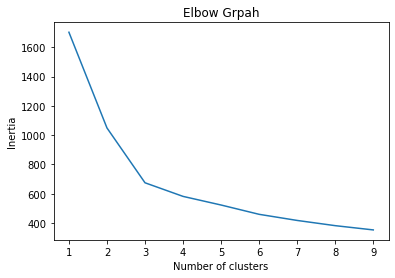

In [11]:
#Find optimal number of clusters
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i,max_iter=1000,random_state=0)
    kmeans.fit_predict(pca_df.iloc[:,0:4])
    wcss.append(kmeans.inertia_)
    
#Elbow graph
plt.plot(range(1,10), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Grpah")
plt.show()

### From the above graph we can conclude that the otpimal number 3 as original data

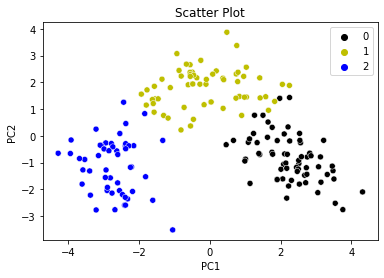

In [12]:
#Clusters representation 
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=0)
y_kc = kmeans.fit_predict(pca_df.iloc[:,0:4])
clusters_kc = pd.DataFrame(y_kc,columns=["Clusters"])
pca_kc = pd.concat([pca_df.iloc[:,0:4],clusters_kc],axis=1)

sns.scatterplot(data=pca_kc, x=pca_kc["PC1"], y=pca_kc["PC2"], hue=y_kc, palette=["k","y","b"])
plt.title("Scatter Plot")
plt.show()

## Hierachical Clustering

In [13]:
#Import Libraries
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

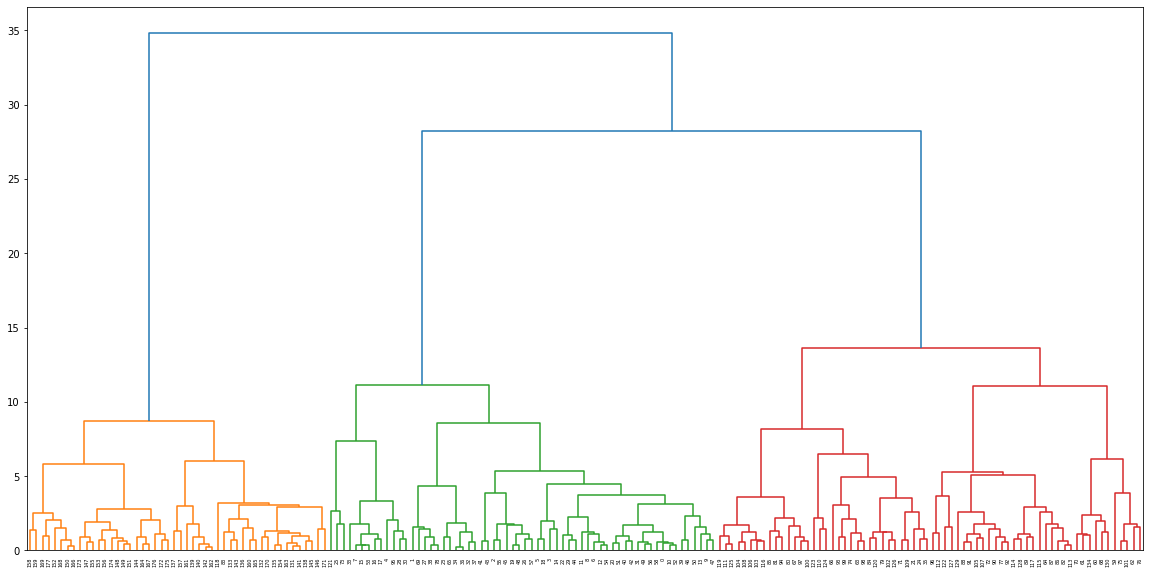

In [14]:
#Findig the number of clusters
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(pca_df.iloc[:,0:4], method="ward"))

### From the above scree plot we can cleraly see that there are 3 clusters

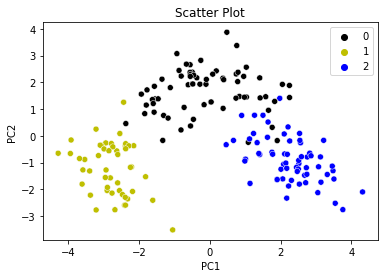

In [15]:
#Clusters representation 
hc = AgglomerativeClustering(n_clusters=3,linkage="ward")
y_hc = hc.fit_predict(pca_df.iloc[:,0:4])
clusters_hc = pd.DataFrame(y_hc,columns=["Clusters"])
pca_hc = pd.concat([pca_df.iloc[:,0:4],clusters_hc],axis=1)

sns.scatterplot(data=pca_hc, x=pca_hc["PC1"], y=pca_hc["PC2"], hue=y_hc, palette=["k","y","b"])
plt.title("Scatter Plot")
plt.show()